# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install mlflow

You should consider upgrading via the 'C:\Users\user\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\user\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip' command.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:

df = pd.read_csv('../diabetes_prediction_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv('../diabetes_prediction_dataset.csv')


print("==== 1. Lima Baris Pertama ====")
display(df.head())

==== 1. Lima Baris Pertama ====


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
print(f"\n==== 2. Ukuran Dataset ====\nJumlah Baris: {df.shape[0]}\nJumlah Kolom: {df.shape[1]}")


==== 2. Ukuran Dataset ====
Jumlah Baris: 100000
Jumlah Kolom: 9


In [7]:


print("\n==== 3. Informasi Kolom ====")
df.info()



==== 3. Informasi Kolom ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:

print("\n==== 4. Missing Value per Kolom ====")
print(df.isnull().sum())




==== 4. Missing Value per Kolom ====
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:

print("\n==== 5. Statistik Deskriptif ====")
display(df.describe())



==== 5. Statistik Deskriptif ====


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000



==== 6. Distribusi Target 'diabetes' ====


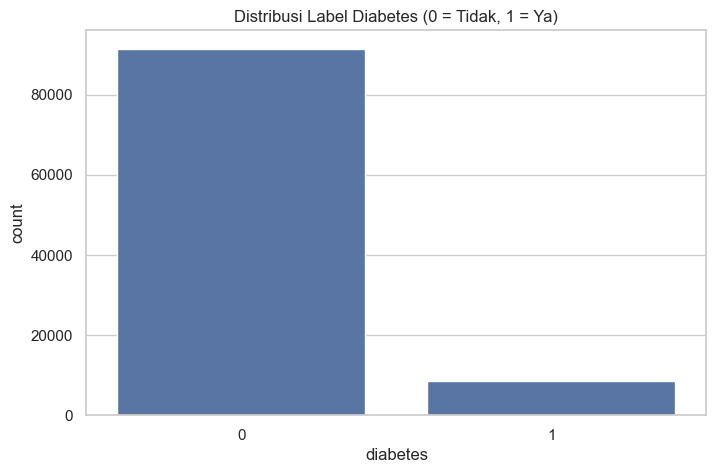

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [10]:


print("\n==== 6. Distribusi Target 'diabetes' ====")
sns.countplot(x='diabetes', data=df)
plt.title("Distribusi Label Diabetes (0 = Tidak, 1 = Ya)")
plt.show()
print(df['diabetes'].value_counts(normalize=True))




==== 7. Distribusi Fitur Kategorikal ====


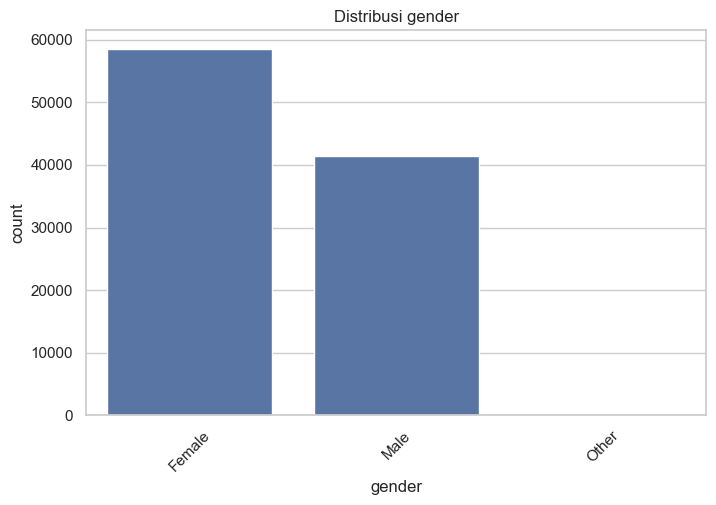

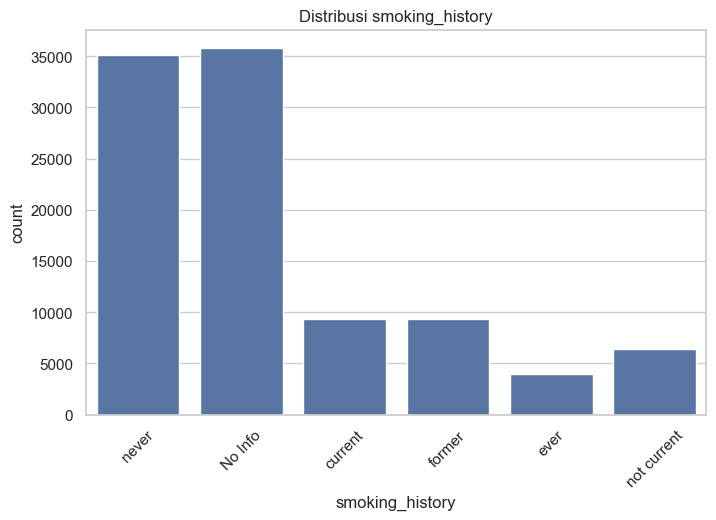

In [11]:

print("\n==== 7. Distribusi Fitur Kategorikal ====")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()



==== 8. Distribusi Fitur Numerik ====


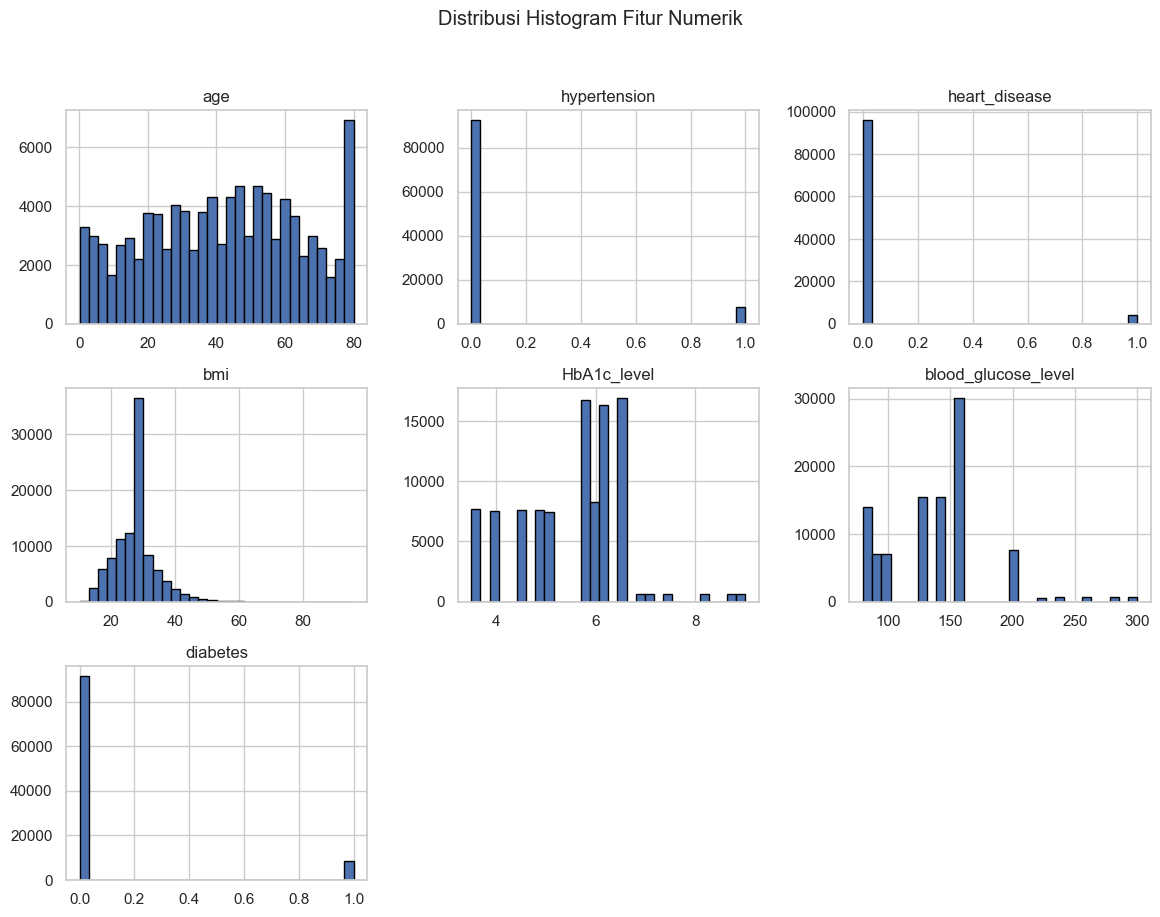

In [12]:


print("\n==== 8. Distribusi Fitur Numerik ====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=30, edgecolor='black', figsize=(14, 10))
plt.suptitle('Distribusi Histogram Fitur Numerik')
plt.show()




==== 9. Korelasi Fitur Numerik ====


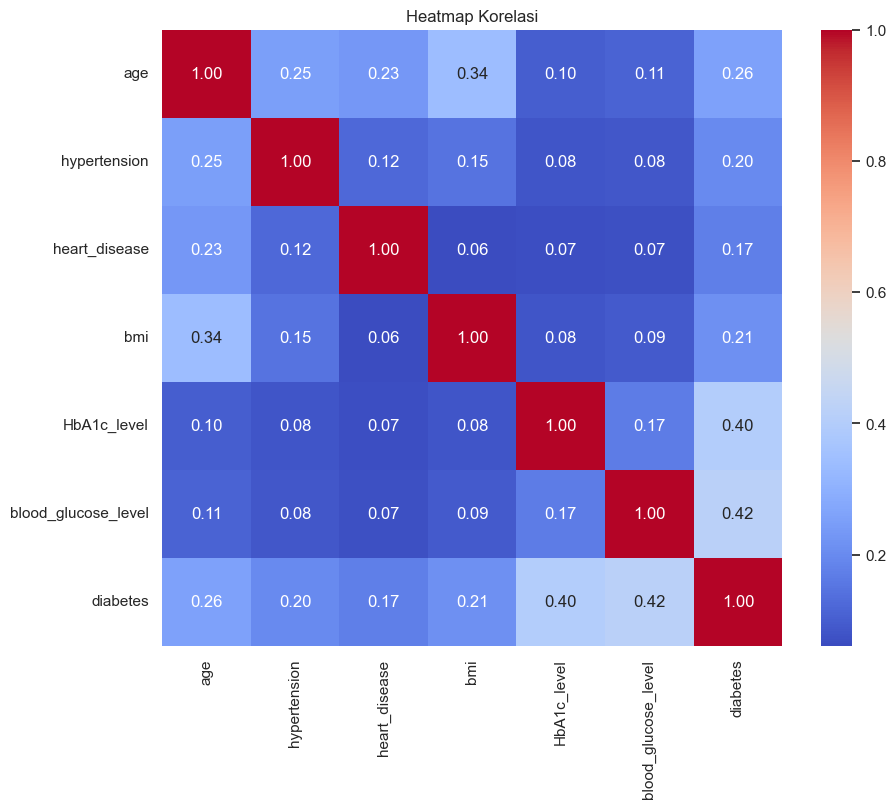

In [13]:

print("\n==== 9. Korelasi Fitur Numerik ====")
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()




==== 10. Boxplot Fitur Numerik terhadap Target ====


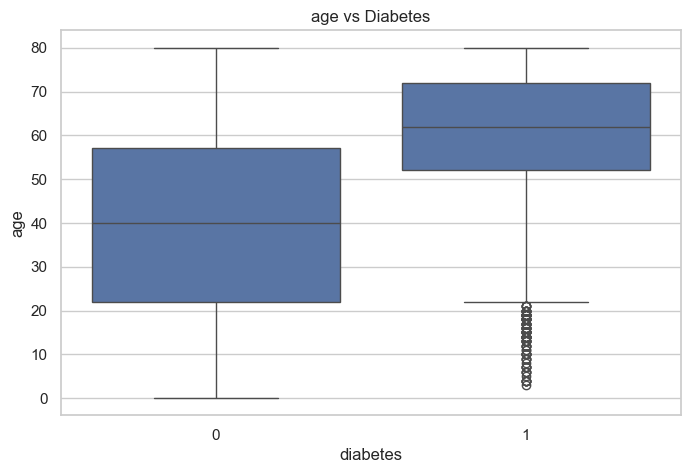

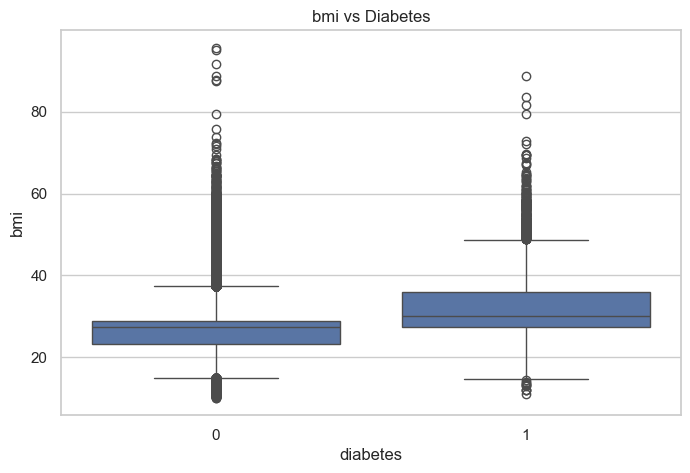

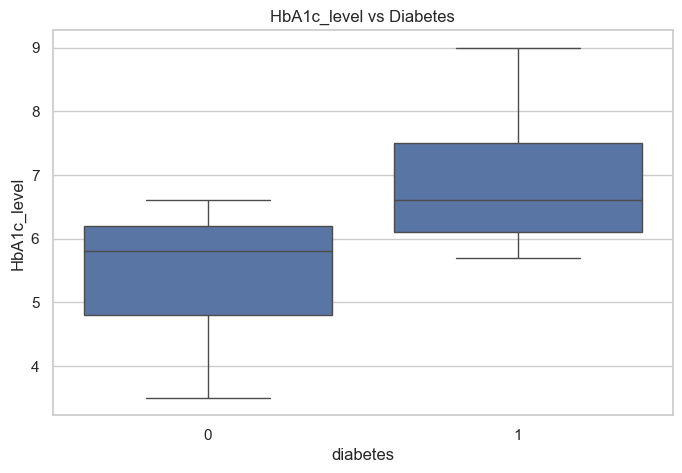

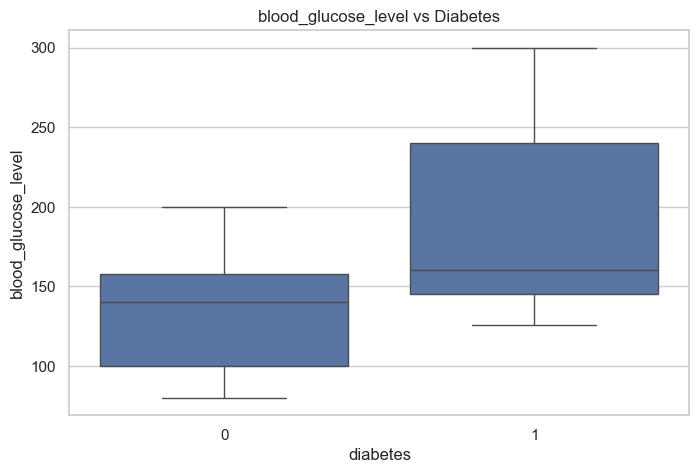

In [14]:

print("\n==== 10. Boxplot Fitur Numerik terhadap Target ====")
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'{col} vs Diabetes')
    plt.show()


In [15]:

print("\n==== 11. Outlier Detection (Z-Score > 3) ====")
z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Jumlah nilai outlier per kolom:")
print(outliers)


==== 11. Outlier Detection (Z-Score > 3) ====
Jumlah nilai outlier per kolom:
age                       0
hypertension           7485
heart_disease          3942
bmi                    1294
HbA1c_level            1315
blood_glucose_level    1403
diabetes               8500
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:

# Load data
df = pd.read_csv("../diabetes_prediction_dataset.csv")  # ganti path jika perlu

# 1. Hapus duplikat
df = df.drop_duplicates()




In [17]:
# 2. Tangani missing value
print("Missing values sebelum ditangani:\n", df.isnull().sum())
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)



Missing values sebelum ditangani:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [18]:
# 3. Simpan kolom target
target = df['diabetes']



In [19]:
# 4. Deteksi & hapus outlier (Z-score) hanya pada fitur numerik non-biner
exclude_cols = ['hypertension', 'heart_disease', 'diabetes']  # kolom biner & target
numeric_cols = df.select_dtypes(include=np.number).columns.difference(exclude_cols)

z_scores = df[numeric_cols].apply(zscore)
non_outliers = (np.abs(z_scores) < 3).all(axis=1)
filtered_df = df[non_outliers].copy()

# Perbarui target agar sesuai setelah filter
filtered_df['diabetes'] = target[non_outliers]

print(f"\nJumlah data setelah menghapus outlier: {filtered_df.shape[0]} baris")




Jumlah data setelah menghapus outlier: 92542 baris


In [20]:
# 5. Encode data kategorikal
categorical_cols = filtered_df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    filtered_df[col] = le.fit_transform(filtered_df[col])



In [21]:
# 6. Normalisasi fitur numerik
features_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
filtered_df[features_to_scale] = scaler.fit_transform(filtered_df[features_to_scale])



In [55]:
# 7. Final check (Distribusi label diabetes)
filtered_df['diabetes'].value_counts()

diabetes
0    86798
1     5744
Name: count, dtype: int64

In [56]:
# 7. Final check (Setelah Processing)
filtered_df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.722515,0,1,4,-0.279523,1.130681,0.123764,0
1,0,0.566737,0,0,0,0.071031,1.130681,-1.521791,0
2,1,-0.589041,0,0,4,0.071031,0.229817,0.617430,0
3,0,-0.233417,0,0,1,-0.565891,-0.470855,0.535152,0
4,1,1.544703,1,1,1,-1.110648,-0.671047,0.535152,0


In [57]:
# 7. Final check (Statistik deskriptif)
filtered_df.describe()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,92542.000000,9.254200e+04,92542.000000,92542.000000,92542.000000,9.254200e+04,9.254200e+04,9.254200e+04,92542.000000
mean,0.416071,3.021315e-17,0.072032,0.037842,2.212260,-5.719385e-16,-3.697752e-16,-2.318773e-17,0.062069
std,0.493303,1.000005e+00,0.258543,0.190816,1.884566,1.000005e+00,1.000005e+00,1.000005e+00,0.241282
min,0.000000,-1.830168e+00,0.000000,0.000000,0.000000,-2.777835e+00,-1.972296e+00,-1.521791e+00,0.000000
25%,0.000000,-8.113059e-01,0.000000,0.000000,0.000000,-6.053899e-01,-6.710474e-01,-9.732730e-01,0.000000
50%,0.000000,3.330096e-02,0.000000,0.000000,3.000000,7.103051e-02,3.299128e-01,1.237637e-01,0.000000
75%,1.000000,7.890018e-01,0.000000,0.000000,4.000000,4.150010e-01,7.302968e-01,6.174302e-01,0.000000
max,2.000000,1.722515e+00,1.000000,1.000000,5.000000,3.411988e+00,2.732217e+00,3.414874e+00,1.000000


In [58]:
# 8. Simpan hasil
filtered_df.to_csv("diabetes_cleaned.csv", index=False)

## Membuat file automate_NamaSiswa.py di folder kerja saat ini (Colab)

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

def preprocess_diabetes_dataset(filepath, save_cleaned=True):
    """
    Fungsi untuk memuat dan melakukan preprocessing dataset diabetes.

    Tahapan preprocessing:
    1. Load dataset
    2. Drop duplikat
    3. Tangani missing values
    4. Encode data kategorikal
    5. Deteksi & hapus outlier (Z-score)
    6. Normalisasi fitur numerik
    7. Simpan data bersih ke file CSV (opsional)
    8. Return dataframe bersih
    """

    # 1. Load dataset
    df = pd.read_csv(filepath)
    print(f"Data awal: {df.shape[0]} baris, {df.shape[1]} kolom")

    # 2. Drop duplicates
    df = df.drop_duplicates()

    # 3. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

    # 4. Encode categorical columns
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # 5. Remove outliers (Z-score method), excluding binary/target columns
    exclude_cols = ['hypertension', 'heart_disease', 'diabetes']
    numeric_cols = df.select_dtypes(include=np.number).columns.difference(exclude_cols)
    z_scores = df[numeric_cols].apply(zscore)
    df = df[(np.abs(z_scores) < 3).all(axis=1)]
    print(f"Setelah hapus outlier: {df.shape[0]} baris")

    # 6. Feature scaling (StandardScaler) untuk fitur numerik saja
    features_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    scaler = StandardScaler()
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    # 7. Save cleaned dataset
    if save_cleaned:
        df.to_csv("diabetes_cleaned.csv", index=False)
        print("Data bersih disimpan ke 'diabetes_cleaned.csv'")

    # 8. Return dataframe
    print("Distribusi label:\n", df['diabetes'].value_counts())
    return df


In [63]:
code = '''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

def preprocess_diabetes_dataset(filepath, save_cleaned=True):
    """
    Fungsi untuk memuat dan melakukan preprocessing dataset diabetes.

    Tahapan preprocessing:
    1. Load dataset
    2. Drop duplikat
    3. Tangani missing values
    4. Encode data kategorikal
    5. Deteksi & hapus outlier (Z-score)
    6. Normalisasi fitur numerik
    7. Simpan data bersih ke file CSV (opsional)
    8. Return dataframe bersih
    """

    # 1. Load dataset
    df = pd.read_csv(filepath)
    print(f"Data awal: {df.shape[0]} baris, {df.shape[1]} kolom")

    # 2. Drop duplicates
    df = df.drop_duplicates()

    # 3. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

    # 4. Encode categorical features
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # 5. Remove outliers with Z-score (exclude binary/target cols)
    exclude_cols = ['hypertension', 'heart_disease', 'diabetes']
    numeric_cols = df.select_dtypes(include=np.number).columns.difference(exclude_cols)
    z_scores = df[numeric_cols].apply(zscore)
    df = df[(np.abs(z_scores) < 3).all(axis=1)]
    print(f"Setelah hapus outlier: {df.shape[0]} baris")

    # 6. Feature scaling
    features_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    scaler = StandardScaler()
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    # 7. Save cleaned dataset
    if save_cleaned:
        df.to_csv("diabetes_cleaned.csv", index=False)
        print("Data bersih disimpan ke 'diabetes_cleaned.csv'")

    # 8. Return dataframe
    print("Distribusi label diabetes:\\n", df['diabetes'].value_counts())
    return df
'''


In [64]:

with open("automate_febie.py", "w") as f:
    f.write(code)
